In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 7##

## Probability ##

In [2]:
# Discussion Question (a):
# P(Mo and Jo both appear)


In [3]:
# Discussion Question (b)
# P(neither Mo nor Jo appears)


## Random Sampling ##

In [4]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [5]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [6]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [8]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


In [11]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
989,6/7/15,1600,IAD,16
1989,6/14/15,662,MSP,0
2989,6/20/15,1939,IAD,2
3989,6/27/15,1197,IAH,-4
4989,7/4/15,1246,KOA,-7
5989,7/11/15,317,IND,-5
6989,7/17/15,1563,ORD,-2
7989,7/24/15,522,PDX,-4
8989,7/30/15,1681,PHL,55
9989,8/6/15,502,JFK,-5


## Distributions ##

In [12]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [13]:
die.sample(10)

Face
2
4
5
2
1
1
3
3
6
4


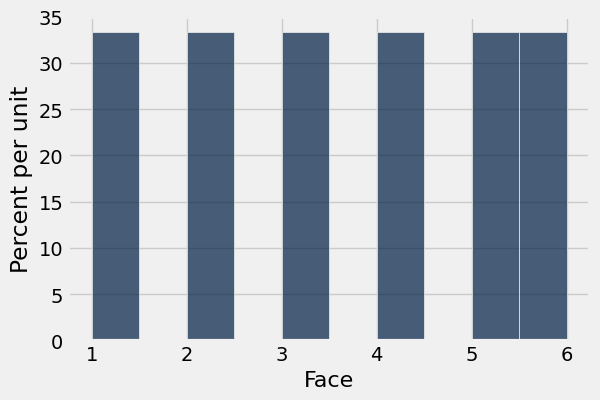

In [14]:
die.hist()

In [15]:
roll_bins = np.arange(0.5, 6.6, 1)

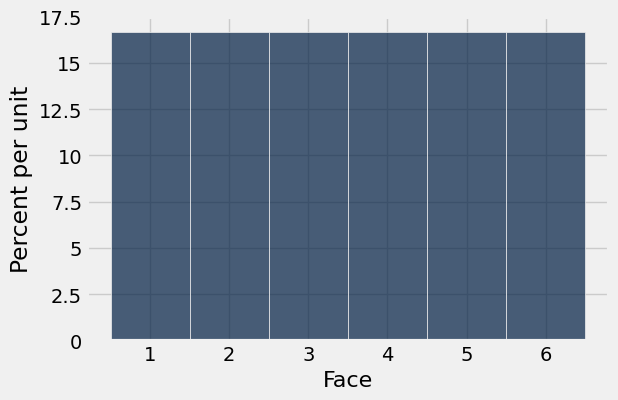

In [16]:
die.hist(bins=roll_bins)

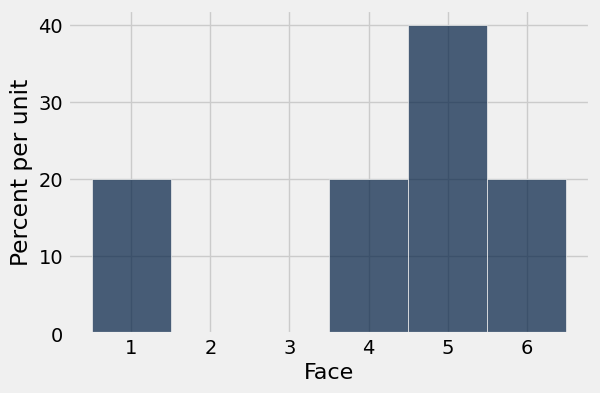

In [17]:
die.sample(10).hist(bins=roll_bins)

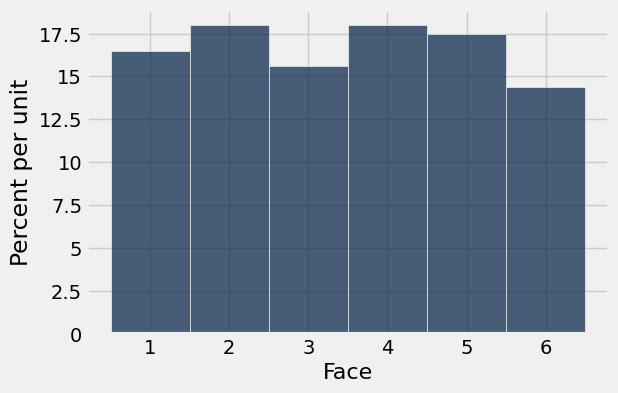

In [18]:
die.sample(1000).hist(bins=roll_bins)

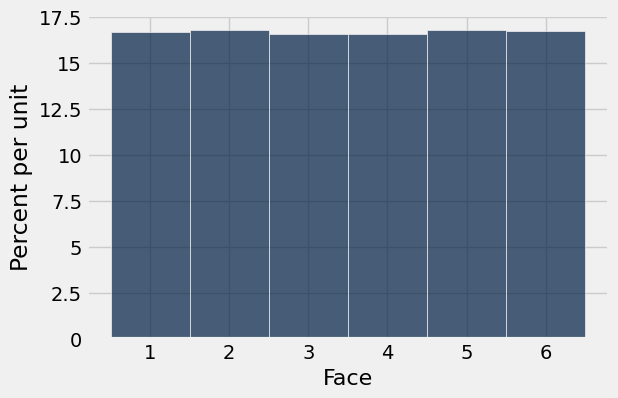

In [19]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples

In [20]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united_bins = np.arange(-20, 201, 5)

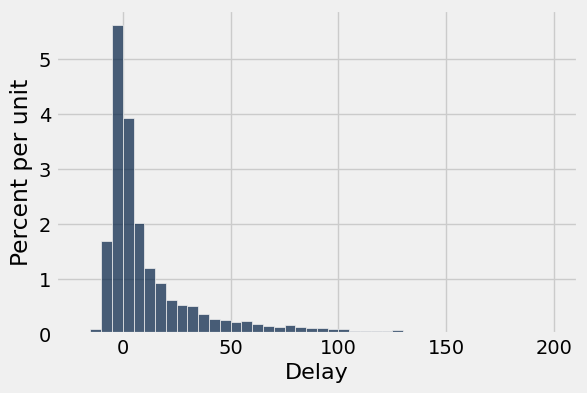

In [22]:
# (Population) Probability Distribution
united.hist('Delay', bins = united_bins)

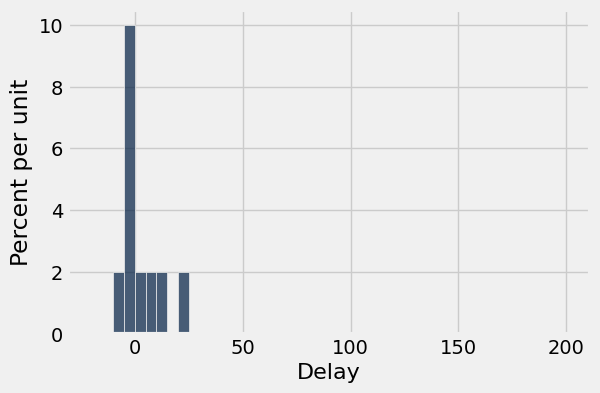

In [23]:
# (Sample) Empirical Distribution
united.sample(10).hist('Delay', bins = united_bins)

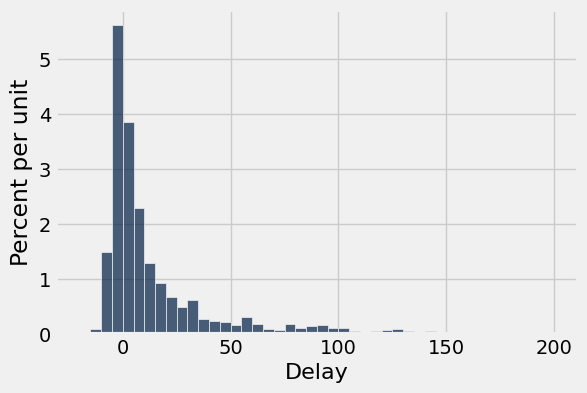

In [24]:
# (Sample) Empirical Distribution
united.sample(1000).hist('Delay', bins = united_bins)

## Statistics

In [25]:
# (Population) Parameter
np.median(united.column('Delay'))

2.0

In [26]:
# (Sample) Statistic
np.median(united.sample(10).column('Delay'))

5.5

In [27]:
# (Sample) Statistic
np.median(united.sample(100).column('Delay'))

0.0

### Probability & Empirical Distributions of a Statistic

In [30]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [32]:
sample_median(10)

-0.5

In [33]:
num_simulations = 2000

In [36]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

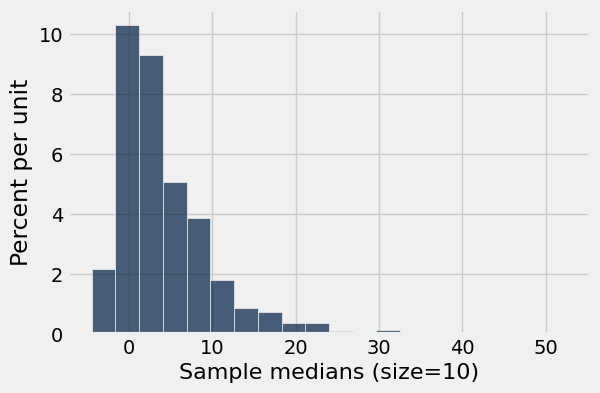

In [37]:
Table().with_column('Sample medians (size=10)', sample_medians).hist(bins=20)

In [38]:
sample_medians = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

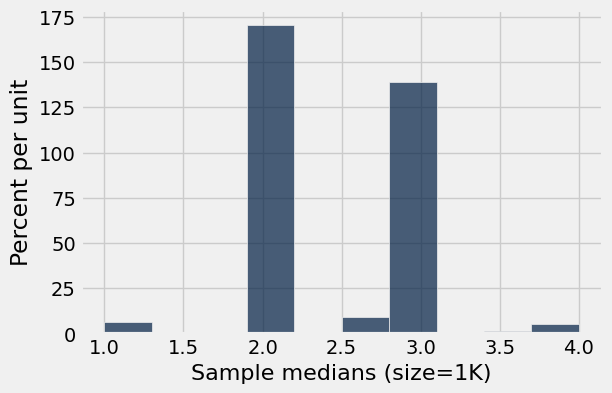

In [39]:
Table().with_column('Sample medians (size=1K)', sample_medians).hist()

#### Empirical Distributions Overlayed

In [40]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [41]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

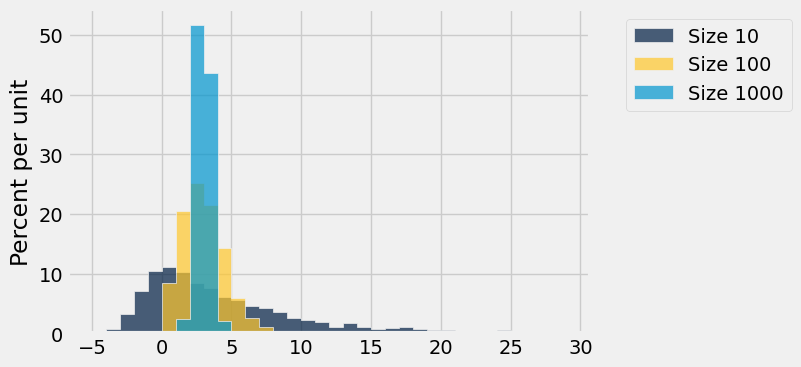

In [42]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [43]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [47]:
sample_proportions(100, population_proportions)

array([ 0.29,  0.71])

In [48]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [52]:
panel_proportion()

0.27

In [53]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

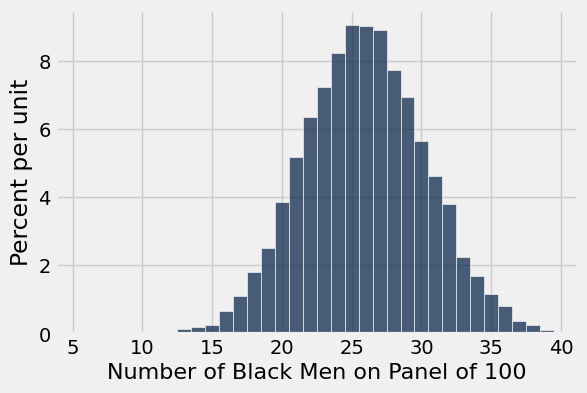

In [54]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [55]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [56]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.76533907,  0.23466093])

In [57]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [58]:
purple_flowers()

75.78040904198062

In [60]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
    
purples

array([ 72.01291712,  75.56512379,  76.31862217, ...,  73.73519914,
        74.70398278,  76.21097955])

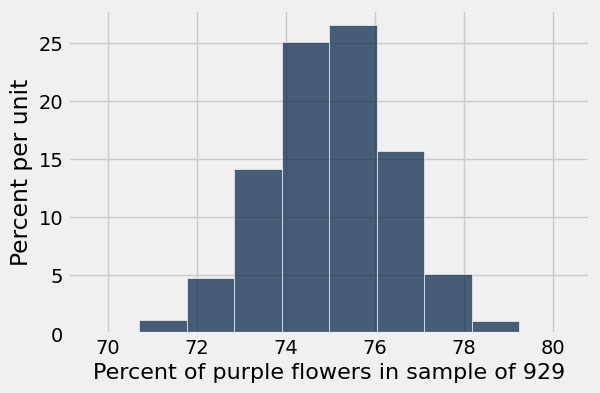

In [61]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

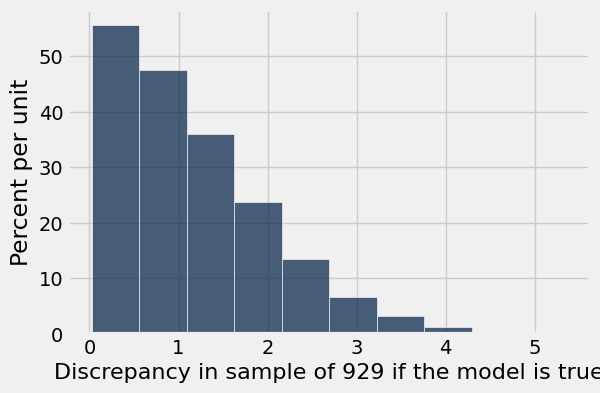

In [62]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [ ]:
abs(observed_purples * 100 - 75)

## Alameda County Jury Panels ##

In [63]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

Ethnicity,Eligible,Panels
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


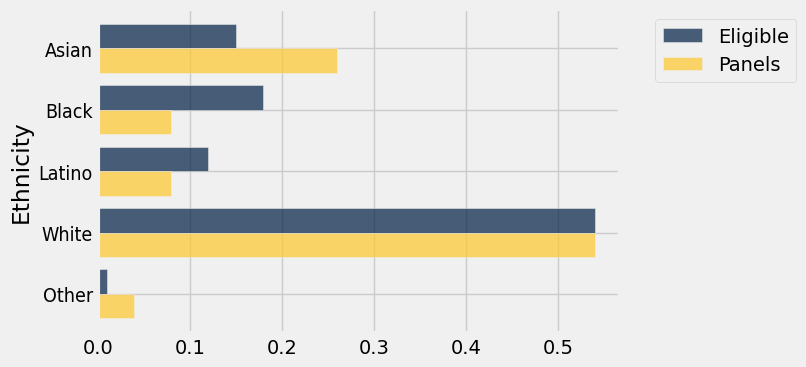

In [64]:
jury.barh('Ethnicity')

In [65]:
# Under the model, this is the true distribution of people
# from which the jurors are randomly sampled
model = make_array(0.15, 0.18, 0.12, 0.54, 0.01)

In [66]:
# Let's simulate a random draw of 1423 jurors from this distribution
simulated = sample_proportions(1423, model)
simulated

array([ 0.15530569,  0.18341532,  0.12930429,  0.52002811,  0.01194659])

In [67]:
# The actual observed distribution (Panels) looks quite different
# from the simulation -- try running this several times to confirm!
jury_with_simulated = jury.with_column('Simulated', simulated)
jury_with_simulated

Ethnicity,Eligible,Panels,Simulated
Asian,0.15,0.26,0.155306
Black,0.18,0.08,0.183415
Latino,0.12,0.08,0.129304
White,0.54,0.54,0.520028
Other,0.01,0.04,0.0119466


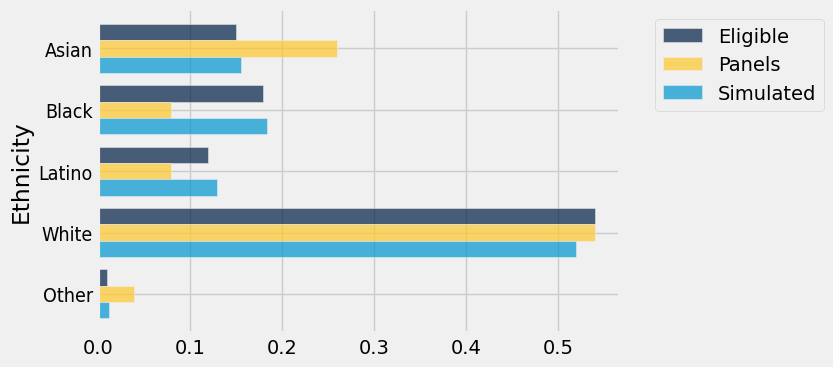

In [68]:
jury_with_simulated.barh('Ethnicity')

## Distance Between Distributions

In [69]:
# We need to understand how each of the 5 categories
# differ from their expected values according to the model.

diffs = jury.column('Panels') - jury.column('Eligible')
jury_with_difference = jury.with_column('Difference', diffs)
jury_with_difference

Ethnicity,Eligible,Panels,Difference
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.1
Latino,0.12,0.08,-0.04
White,0.54,0.54,0
Other,0.01,0.04,0.03


## Total Variation Distance

In [70]:
def tvd(dist1, dist2):
    return sum(abs(dist1 - dist2))/2

In [71]:
# The TVD of our observed data (Panels) from their expected values
# assuming the model is true (Eligbible)
obsvd_tvd = tvd(jury.column('Panels'), jury.column('Eligible'))
obsvd_tvd

0.14000000000000001

In [78]:
# The TVD of a model simluation from its expected values
tvd(sample_proportions(1423, model), jury.column('Eligible'))

0.013499648629655619

In [79]:
def simulated_tvd():
    return tvd(sample_proportions(1423, model), model)

tvds = make_array()

num_simulations = 10000
for i in np.arange(num_simulations):
    new_tvd = simulated_tvd()
    tvds = np.append(tvds, new_tvd)

Observed TVD: 0.14


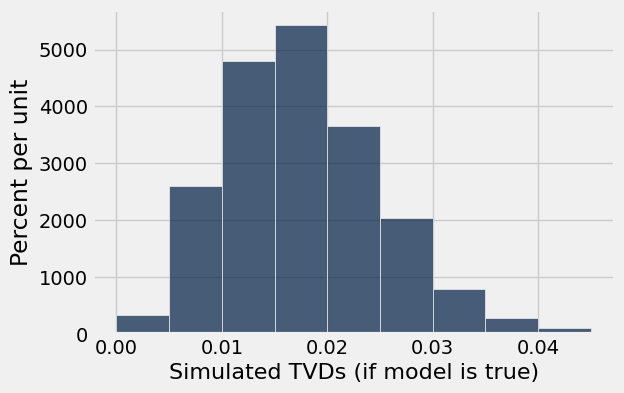

In [80]:
title = 'Simulated TVDs (if model is true)'
bins = np.arange(0, .05, .005)

Table().with_column(title, tvds).hist(bins = bins)
print('Observed TVD: ' + str(obsvd_tvd))

## The GSI's Defense ##

In [81]:
scores = Table.read_table('scores_by_section.csv')
scores

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


In [82]:
scores.group('Section')

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [83]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [84]:
observed_average = 13.6667 

In [85]:
random_sample = scores.sample(27, with_replacement=False)
random_sample

Section,Midterm
3,10
7,17
6,19
2,11
10,20
10,21
3,15
3,20
12,20
1,25


In [87]:
np.average(random_sample.column('Midterm'))

15.592592592592593

In [88]:
# Simulate one value of the test statistic 
# under the hypothesis that the section is like a random sample from the class

def random_sample_midterm_avg():
    random_sample = scores.sample(27, with_replacement = False)
    return np.average(random_sample.column('Midterm'))

In [89]:
# Simulate 50,000 copies of the test statistic

sample_averages = make_array()

for i in np.arange(50000):
    sample_averages = np.append(sample_averages, random_sample_midterm_avg())    

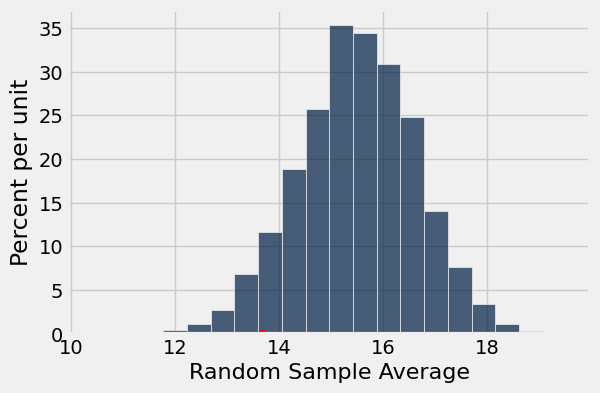

In [90]:
# Compare the simulated distribution of the statistic
# and the actual observed statistic

averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(observed_average, 0, color = 'red', s=40);

In [91]:
sum(sample_averages <= observed_average) / 50000

0.05756

In [92]:
# 5% of 50,000 = 2500

five_percent_point = averages_tbl.sort(0).column(0).item(2500)
five_percent_point

13.592592592592593

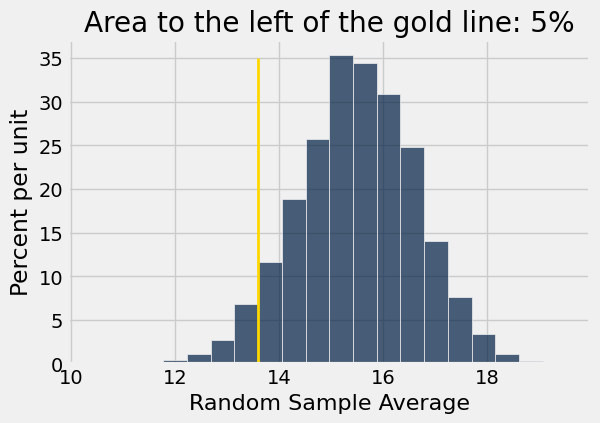

In [93]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('Area to the left of the gold line: 5%');